1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Probability of observing 15 or more hurricanes: 0.0026807978573869518
Z-score: 2.508912024170563


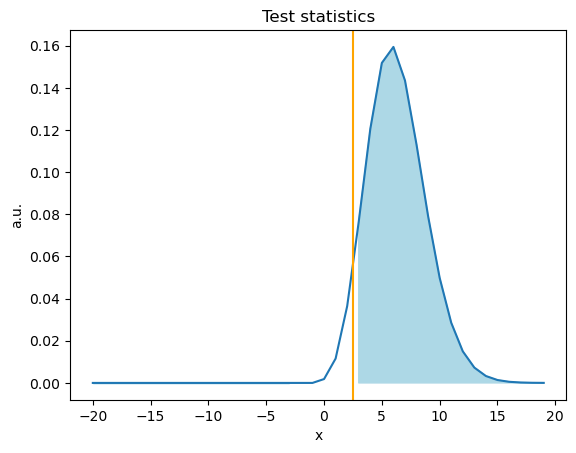

As we can see from the value of the Z score: 2.508912024170563 , it is larger than 2 and therefore the number of hurricanes occurred in 2015 is significantly larger than the other years.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

lambda_ = 6.3 # Number of hurricanes per year on average
p_15_or_more = 1 - np.power(np.e, -lambda_) * sum(np.power(lambda_, k) / np.math.factorial(k) for k in range(1, 16))#Poisson distribution of hurricanes
print("Probability of observing 15 or more hurricanes:", p_15_or_more)
z_score = abs(p_15_or_more-lambda_)/ np.sqrt(lambda_)
print("Z-score:", z_score) 
x = np.arange(-20, 20)
y = poisson.pmf(x, mu=lambda_, loc=0)
plt.plot(x, y)
plt.fill_between(x, y, where=np.abs(x) > np.abs(z_score), color='lightblue')
plt.axvline(z_score, linestyle='-', color='orange')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()
print("As we can see from the value of the Z score:", z_score, ", it is larger than 2 and therefore the number of hurricanes occurred in 2015 is \
significantly larger than the other years.")

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T_score: -3.786997938137629
p-value = 0.004302464132864604
The pvalue is littler than alfa: the change in blood pressure within the samples is NOT statistically significant.


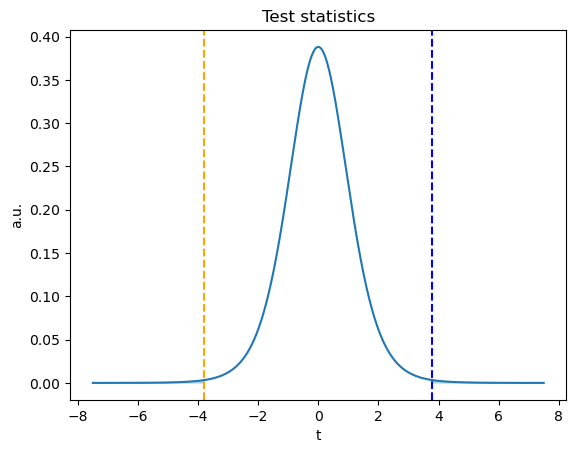

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

alfa = 0.05
data = {'pre': [120, 132, 120, 110, 115, 128, 120, 112, 110, 100],
       'post': [140, 156, 145, 130, 117, 148, 137, 119, 127, 135]}
df = pd.DataFrame(data)
pre_mean = np.mean(df['pre'])
post_mean = np.mean(df['post'])
pre_var = np.var(df['pre'], ddof=1)
post_var = np.var(df['post'], ddof=1)
n = len(data['pre'])
sigma = np.sqrt((pre_var + post_var)/2)
t_statistic = (pre_mean- post_mean)/(sigma*np.sqrt(2/n))
T = (pre_mean- post_mean)/(sigma*np.sqrt(2/n))
print("T_score:", T)
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)
if pvalue<alfa:
    print("The pvalue is littler than alfa: the change in blood pressure within the samples is NOT statistically significant.")
if pvalue>=alfa:
    print("The pvalue is larger tahn alfa: the change in blood pressure within the samples is statistically significant.")
xs = np.linspace(-7.5, +7.5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

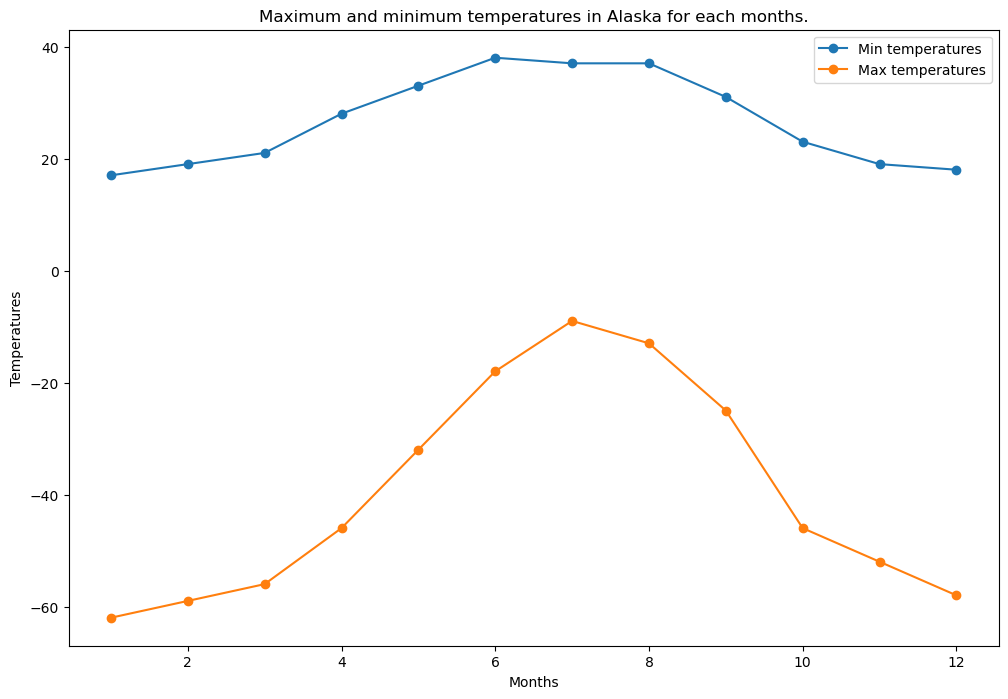

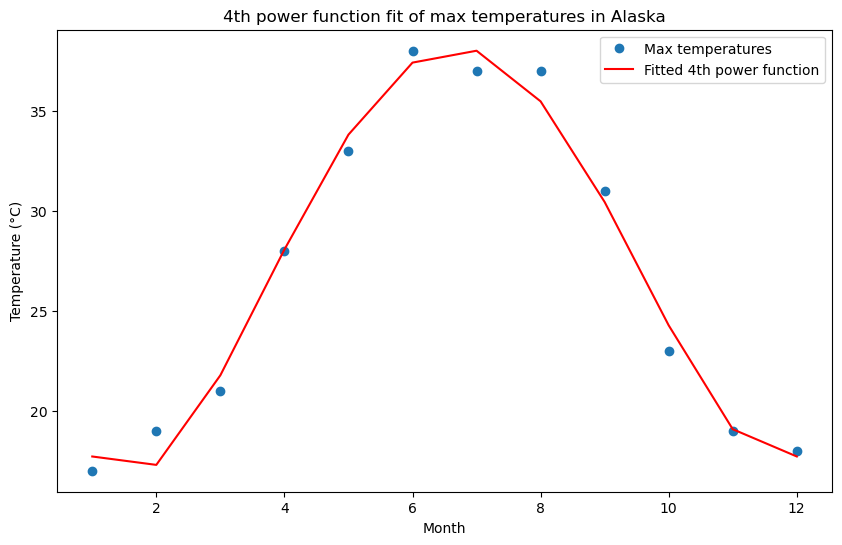

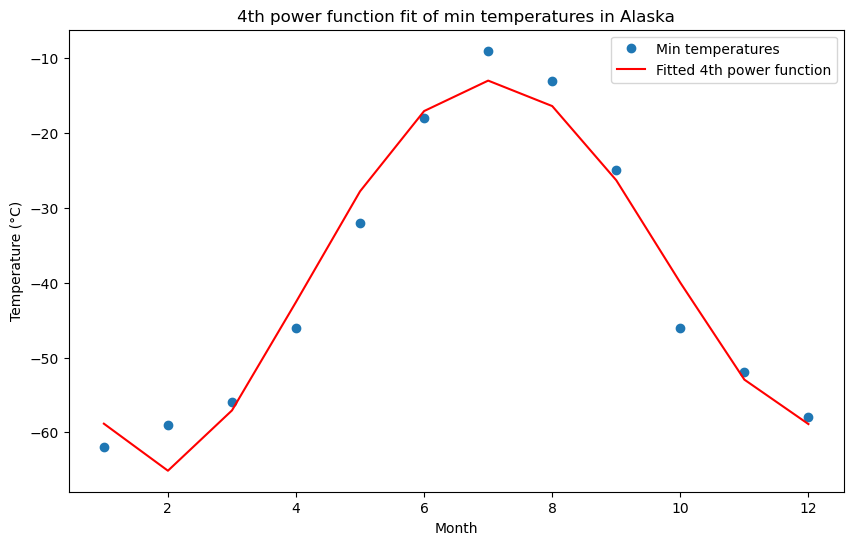

chi2_max = 0.4161199125540531
p-value for maximum temperatures = 0.9811359702345792
The pvalue is greater than  0.05 and therefore the fit for the function is reasonable.
chi2_min = 5.220936520346647
p-value for minimum temperatures = 0.2653698450551587
The pvalue is greater than  0.05 and therefore the fit for the function is reasonable.
Goodness of fit for max temp:  0.9858616017962294
Goodness of fits for min temp:  0.9644167039763393
Time offset min: -0.82 +- 0.10
Time offset max: -2.06 +- 0.39


In [3]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import math
from scipy import stats

max_temps = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min_temps = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
months = np.arange(1, 13)

plt.figure(figsize=(12,8))
plt.plot(months, max_temps, 'o-', label='Min temperatures')
plt.plot(months, min_temps, 'o-', label='Max temperatures')
plt.title("Maximum and minimum temperatures in Alaska for each months.")
plt.xlabel('Months')
plt.ylabel('Temperatures')
plt.legend()
plt.show()
def cosine(x, A, B, C, D):
    return A * np.cos(B * x + C) + D
def sinusoidal(x, A, B, C, D):
    return -(A * np.sin(B * x + C) + D)
def cube(x, a, b, c, d):
    return a * x ** 3 + b * x ** 2 + c * x + d
def power_5(x, a, b, c, d, e, f):
    return a * x ** 5 + b * x ** 4 + c * x ** 3 + d * x ** 2 + e * x + f
def power_4(x, a, b, c, d, e):
    return a * x ** 4 + b * x ** 3 + c * x ** 2 + d * x + e

popt, pcov = curve_fit(power_4, months, max_temps)
max_temps_fit = power_4(months, *popt)
plt.figure(figsize=(10, 6))
plt.plot(months, max_temps, 'o', label='Max temperatures')
plt.plot(months, max_temps_fit, 'r', label='Fitted 4th power function')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('4th power function fit of max temperatures in Alaska')
plt.legend()
plt.show()
popt_min, pcov_min = curve_fit(power_4, months, min_temps)
min_temps_fit = power_4(months, *popt_min)
plt.figure(figsize=(10, 6))
plt.plot(months, min_temps, 'o', label='Min temperatures')
plt.plot(months, min_temps_fit, 'r', label='Fitted 4th power function')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('4th power function fit of min temperatures in Alaska')
plt.legend()
plt.show()
sigma_max = np.sqrt(np.abs(max_temps))
ndof_max = 5 - 1
chi2_max = np.sum(((max_temps - max_temps_fit)**2) / sigma_max**2)
print("chi2_max =", chi2_max)
pvalue_max = 1. - stats.chi2.cdf(chi2_max, ndof_max)
print("p-value for maximum temperatures =", pvalue_max)
if (pvalue_max<0.05):
    print("The fit for maximum temperatures is unsatisfactory. The fit needs to be changed.")
elif pvalue_max>=0.05:
    print("The pvalue is greater than ", 0.05, "and therefore the fit for the function is reasonable.")
sigma_min = np.sqrt(np.abs(min_temps))
ndof_min = 5 - 1
chi2_min = np.sum(((min_temps - min_temps_fit)**2) / sigma_min**2)
print("chi2_min =", chi2_min)
pvalue_min = 1. - stats.chi2.cdf(chi2_min, ndof_min)
print("p-value for minimum temperatures =", pvalue_min)
if (pvalue_min<0.05):
    print("The fit for maximum temperatures is unsatisfactory. The fit needs to be changed.")
elif pvalue_min>=0.05:
    print("The pvalue is greater than ", 0.05, "and therefore the fit for the function is reasonable.")
ssr_max = np.sum((max_temps_fit - max_temps)**2)
tss_max = np.sum((np.mean(max_temps_fit) - max_temps)**2)
rsq_max = 1 - ssr_max / tss_max
ssr_min = np.sum((min_temps_fit - min_temps)**2)
tss_min = np.sum((np.mean(min_temps_fit) - min_temps)**2)
rsq_min = 1 - ssr_min / tss_min
print("Goodness of fit for max temp: ", rsq_max)
print("Goodness of fits for min temp: ", rsq_min)
print("Time offset min: %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("Time offset max: %.2f +- %.2f" % (popt_min[1], np.sqrt(pcov_min[1,1])))
# The values of the time offset are close but not the same

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

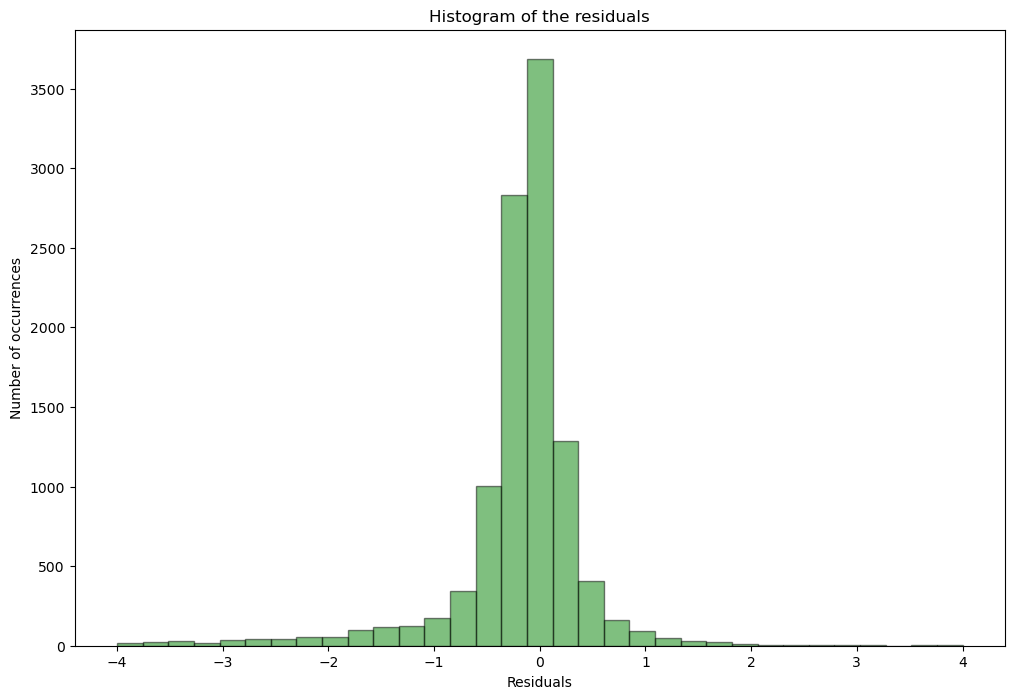

Minimum value of residuals: -160.8499999999989
Maximum value of residuals: 11.32000000000005


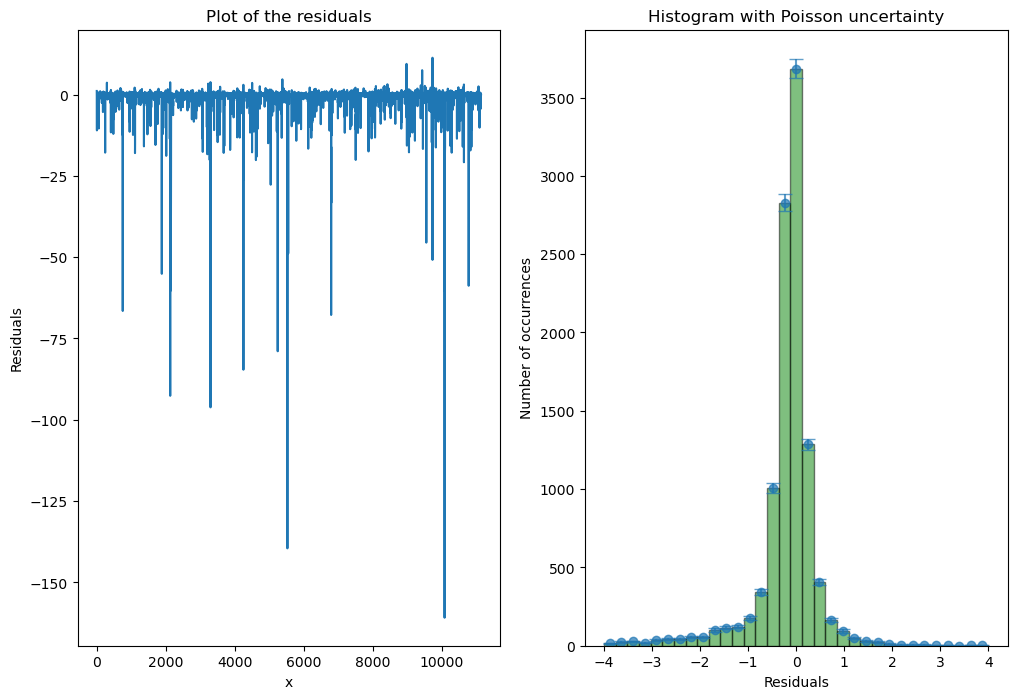

scale: 10867.65 +- 164.12
mu: -0.09 +- 0.00
sigma: 0.23 +- 0.00


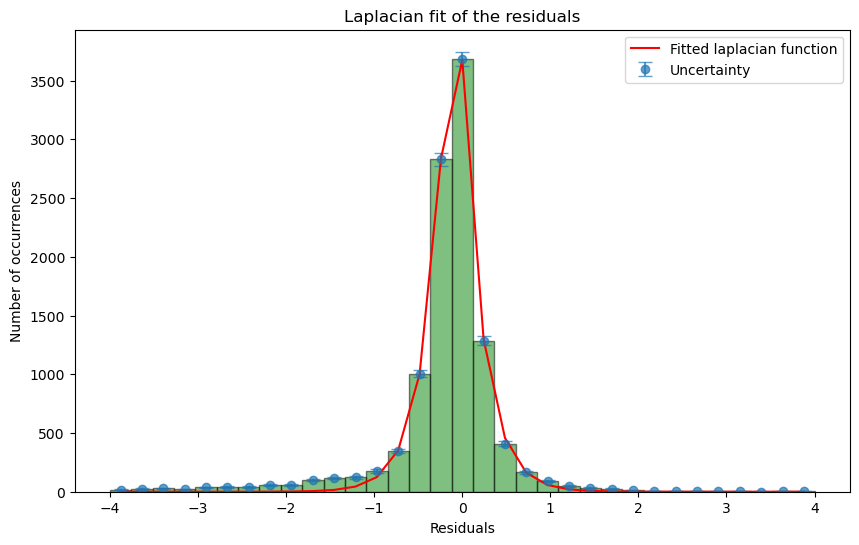

chi2_res = 21.65613960506341
p-value for the residuals = 0.9349939659435159
The pvalue is greater than  0.05 and therefore the fit for the function is reasonable.


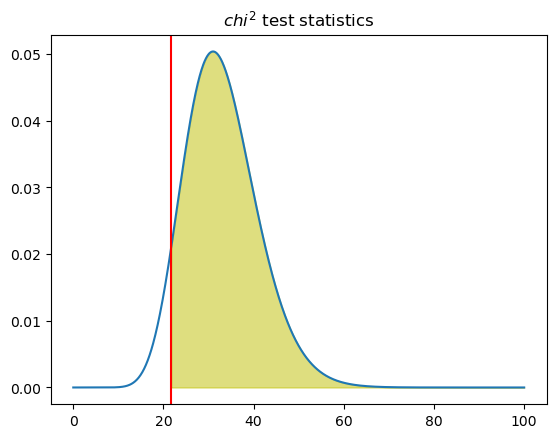

In [4]:
# !wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
import pickle, math
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

filename = "./data/residuals_261.pkl"
data = (pd.read_pickle(filename)).tolist()
df = pd.DataFrame(data)
plt.figure(figsize=(12,8))
bin_number = round(1+3.3*math.log(len(df['residuals'])))+1 #31 bins according to Sturge's rule. I choose to add 1 instead of taking it away.
h, bins, _ = plt.hist(df['residuals'].values, bins=bin_number, range=(-4,4), alpha=0.5, color='g', linewidth=1, edgecolor='black')
plt.title("Histogram of the residuals")
plt.ylabel('Number of occurrences')
plt.xlabel('Residuals')
plt.show()
print("Minimum value of residuals:", min(df['residuals'].values))
print("Maximum value of residuals:", max(df['residuals'].values))
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.title("Plot of the residuals") # To better visualize data
plt.plot(df['residuals'].values)
plt.xlabel('x')
plt.ylabel('Residuals')
plt.subplot(1, 2, 2)
plt.title("Histogram with Poisson uncertainty")
poisson_uncertainty = np.sqrt(h)
error_bars = np.zeros_like(h)
bin_centers = (bins[:-1] + bins[1:]) / 2
for i, (count, uncertainty) in enumerate(zip(h, poisson_uncertainty)):
    error_bars[i] = math.sqrt(2 * count - uncertainty**2)
plt.errorbar(bin_centers, h, yerr=error_bars, fmt='o', capsize=5, alpha=0.7)
plt.hist(df['residuals'].values, bins=bin_number, range=(-4,4), alpha=0.5, color='g', linewidth=1, edgecolor='black')
plt.ylabel('Number of occurrences')
plt.xlabel('Residuals')
plt.show()

def cosine(x, A, B, C, D):
    return A * np.cos(B * x + C) + D
def sinusoidal(x, A, B, C, D):
    return -(A * np.sin(B * x + C) + D)
def power_5(x, a, b, c, d, e, f):
    return a * x ** 5 + b * x ** 4 + c * x ** 3 + d * x ** 2 + e * x + f
def power_4(x, a, b, c, d, e):
    return a * x ** 4 + b * x ** 3 + c * x ** 2 + d * x + e
def linear(x, a, b):
    return a * x + b
def power_10(x, a, b, c, d, e, f, g, h, i, j, k):
    return a*x**10 + b*x**9 + c*x**8 + d*x**7 + e*x**6 + f*x**5+ g*x**4 + h*x**3 + i*x**2 + j*x + k
def laplace(x, scale, mu, b):
    return scale * 0.5 * np.exp(-abs(x - mu) / b)

popt, pcov = curve_fit(laplace, bin_centers, h, p0=[800, 0, 1])
res_fit = laplace(bin_centers, *popt)
print("scale: %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("mu: %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("sigma: %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))
plt.figure(figsize=(10, 6))
plt.errorbar(bin_centers, h, yerr=error_bars, fmt='o', capsize=5, alpha=0.7, label='Uncertainty')
plt.plot(bin_centers, res_fit, 'r', label='Fitted laplacian function')
plt.hist(df['residuals'].values, bins=bin_number, range=(-4,4), alpha=0.5, color='g', linewidth=1, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Number of occurrences')
plt.title('Laplacian fit of the residuals')
plt.legend()
plt.show()
sigma_res = np.sqrt(np.abs(df['residuals'].values))
ndof_res = len(bin_centers) 
chi2_res = np.sum(((h - res_fit)**2) / h**2)
print("chi2_res =", chi2_res)
pvalue_res = 1. - stats.chi2.cdf(chi2_res, ndof_res)
print("p-value for the residuals =", pvalue_res)
if (pvalue_res<0.05):
    print("The fit for residuals is unsatisfactory. The fit needs to be changed.")
elif pvalue_res>=0.05:
    print("The pvalue is greater than ", 0.05, "and therefore the fit for the function is reasonable.")
t = np.linspace(0, 100, 1000)
ts = stats.chi2.pdf(t, df=ndof_res)
plt.figure()
plt.plot(t, ts)
plt.title("$chi^2$ test statistics")
plt.axvline(chi2_res, color='red')
plt.fill_between(t, ts, where=(t > chi2_res), color='y', alpha=0.5)
plt.show()

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

Outliers: [2008.73101   99.     ]
Outliers: [2009.26831   99.     ]


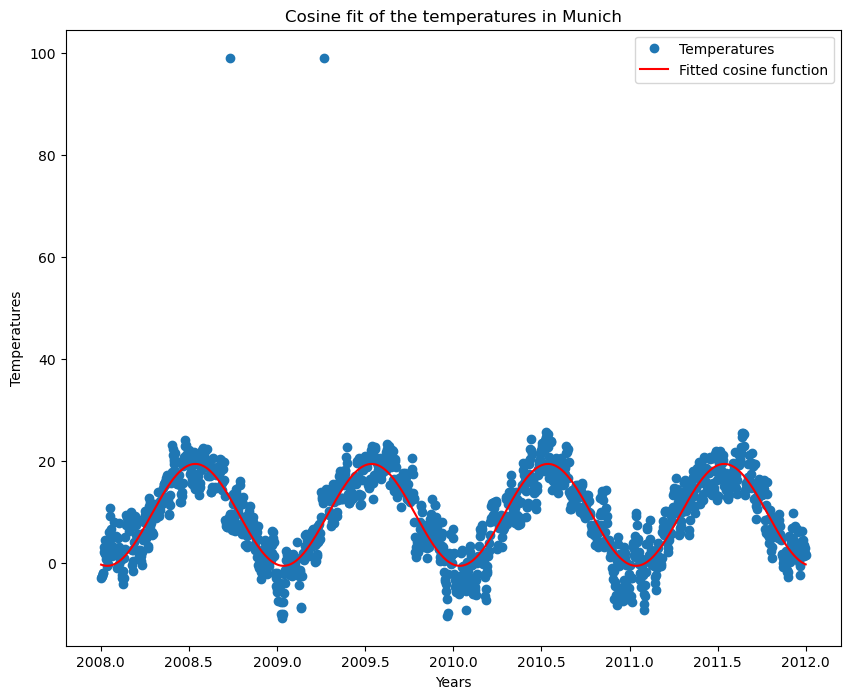

Best-fit parameters:
a = -9.988133689134516 +/- 0.17961047334210886
b = 12.333023014196588 +/- 0.01798305242276112
c = 9.38411486809072 +/- 0.12700529122712614
The average temperature in Munich from 2008 to 2012 was: 9.384097734976043 C°
Typical daily average values predicted by the model for the coldest time of year: -0.5943087386806631
Typical daily average values predicted by the model for the hottest time of year: 12.834019105477791
SSR of f(x): 34359.85859996652 
SSR of g(x): 34352.794053704085
Test f(x) vs g(x):
p-value: 0.584 , additional parameter necessary: NO


In [5]:
# !wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/
def cosine(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c
filename = "./data/munich_temperatures_average_with_bad_data.txt"
data = pd.read_csv(filename, sep=' ', header=None)
useful_data = []
for i in range(len(data[0])):
    if (data[0][i]>=2008)and(data[0][i]<=2012):
        useful_data.append(data.iloc[i])
useful_data = np.array(useful_data)
# Now I have the data requested in useful_data. It is not seen as a dataframe.
for i in range(len(useful_data)):
    if useful_data[i,1]>=40:
        print("Outliers:", useful_data[i])
popt, pcov = curve_fit(cosine, useful_data[:,0], useful_data[:,1])
temp_fit = cosine(useful_data[:,0], *popt)
plt.figure(figsize=(10,8))
plt.plot(useful_data[:,0], useful_data[:,1], 'o', label='Temperatures')
plt.plot(useful_data[:,0], temp_fit, 'r', label='Fitted cosine function')
plt.xlabel('Years')
plt.ylabel('Temperatures')
plt.title('Cosine fit of the temperatures in Munich')
plt.legend()
plt.show()
a_fit = popt[0]
b_fit = popt[1]
c_fit = popt[2]
print('Best-fit parameters:')
print('a =', a_fit, '+/-', np.sqrt(pcov[0, 0]))
print('b =', b_fit, '+/-', np.sqrt(pcov[1, 1]))
print('c =', c_fit, '+/-', np.sqrt(pcov[2, 2]))
avg_temp = np.mean(useful_data[:,1])
print(f"The average temperature in Munich from 2008 to 2012 was: {avg_temp} C°")
print("Typical daily average values predicted by the model for the coldest time of year:", cosine(useful_data[np.argmin(useful_data[:,1]), 0], *popt))
print("Typical daily average values predicted by the model for the hottest time of year:", cosine(useful_data[np.argmax(useful_data[:,1]), 0], *popt))
'''
What is the meaning of the 'b' parameter, and what physical sense does it have?
The 'b' parameter found in the cosine function f(t) is a dimensionless number that represents a phase shift of the cosine. A phase shift results in a 
horizontal translation of the graph of the function. If the 'b' parameter was negative, than the graph would be shifted to the left. In our case, 'b' 
is positive and therefore the graph of the cosine function f(t) is shifted to the right.
'''
def g(t, a, b, c, d):
    return a * np.cos(2 * np.pi * b* t + c) + d
popt_g, pcov_g = curve_fit(g, useful_data[:,0], useful_data[:,1])
alpha = 0.05
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval
g_fit = g(useful_data[:,0], *popt_g)
ssr_f = np.sum((temp_fit - useful_data[:,1])**2)
ssr_g = np.sum((g_fit -useful_data[:,1])**2)
ndof_f = 3-1
ndof_g = 4-1
N = len(useful_data)
print("SSR of f(x):", ssr_f, "\nSSR of g(x):", ssr_g)
print("Test f(x) vs g(x):")
pval_1_vs_2 = Ftest(ssr_f, ssr_g, ndof_f, ndof_g, N, verbose=True)